# Instructions
- Some parts of the code are already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

# Face detection
Task is to predict the boundaries(mask) around the face in a given image.

## Dataset
Faces in images marked with bounding boxes. Have around 500 images with around 1100 faces manually tagged via bounding box.

### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import tensorflow as tf
print (tf.__version__)

2.2.0-rc3


In [0]:
#Clear out notebook session
tf.keras.backend.clear_session()

### Change current working directory to project folder (1 mark)

In [4]:
import os
os.getcwd()
# os.chdir('/content/drive/My Drive')

'/content'

In [5]:
os.chdir('/content/drive/My Drive/Face recognition')
os.getcwd()

'/content/drive/My Drive/Face recognition'

In [6]:
!ls -l


total 1351400
-rw------- 1 root root     684448 May  3 05:34  ACV_Test_Face_detection_R10_Project.ipynb
-rw------- 1 root root 1356868279 Apr 25 08:19 'images (1).npy'
-rw------- 1 root root   13139904 Apr 26 16:25  model-1.36.h5
-rw------- 1 root root   13139904 Apr 26 15:11  testmodel.h5


### Load the "images.npy" file (2 marks)
- This file contains images with details of bounding boxes

In [0]:
import numpy as np
data = np.load('images (1).npy', mmap_mode=None, allow_pickle=True)
#Here the data contains 2 array: 0 represent image and 1 represents bounding box of faces

### Check one sample from the loaded "images.npy" file  (2 marks)

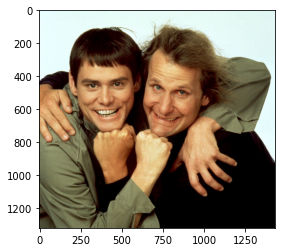

In [8]:
import matplotlib.pyplot as plt
plt.imshow(data[175][0])
#This displays the plot for image


In [9]:
print(data[175][1])
# This represents bounding box of faces in image

[{'label': ['Face'], 'notes': '', 'points': [{'x': 0.16735537190082644, 'y': 0.2769058295964126}, {'x': 0.3853305785123967, 'y': 0.5459641255605381}], 'imageWidth': 1433, 'imageHeight': 1321}, {'label': ['Face'], 'notes': '', 'points': [{'x': 0.4617768595041322, 'y': 0.28699551569506726}, {'x': 0.6642561983471075, 'y': 0.547085201793722}], 'imageWidth': 1433, 'imageHeight': 1321}]


### Set image dimensions   (1 mark)
- Initialize image height, image width with value: 224 

In [0]:
#Since MobileNet uses image with 224*224

IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224

#As given the question, the width and height has been set to 224 for all the images

### Create features and labels
- Here feature is the image
- The label is the mask
- Images will be stored in "X_train" array
- Masks will be stored in "masks" array

In [11]:
#No of rows in data - total no images
data.shape[0]

#No of cols in data - image,boundary box of face
data.shape[1]

print(data.shape[0],data.shape[1])

409 2


In [0]:
#This is for the preprocessing of the Input images

import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input

masks = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))
X_train = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
for index in range(data.shape[0]):
    img = data[index][0]
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    try:
      img = img[:, :, :3]
    except:
      continue
    X_train[index] = preprocess_input(np.array(img, dtype=np.float32))
    for i in data[index][1]:
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
        masks[index][y1:y2, x1:x2] = 1

### Print the shape of X_train and mask array  (1 mark)

In [13]:
print ('Shape of X_train  : ',X_train.shape)

Shape of X_train  :  (409, 224, 224, 3)


In [14]:
print ('Shape of masks  : ',masks.shape)

Shape of masks  :  (409, 224, 224)


### Print a sample image and image array

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[-0.31764704 -0.1607843  -0.60784316]
  [-0.2235294  -0.06666666 -0.60000002]
  [-0.2235294  -0.06666666 -0.67058825]
  ...
  [ 0.35686278  0.29411769  0.00392163]
  [ 0.45098042  0.39607847  0.10588241]
  [ 0.51372552  0.45882356  0.1686275 ]]

 [[-0.32549018 -0.18431371 -0.56862748]
  [-0.10588235  0.05098045 -0.44313723]
  [-0.12156862  0.00392163 -0.52941179]
  ...
  [ 0.45882356  0.41960788  0.11372554]
  [ 0.49803925  0.45882356  0.15294123]
  [ 0.53725493  0.49803925  0.19215691]]

 [[-0.19215685 -0.05882353 -0.372549  ]
  [-0.05098039  0.082353   -0.32549018]
  [-0.1607843  -0.04313725 -0.52156866]
  ...
  [ 0.5529412   0.52156866  0.20000005]
  [ 0.51372552  0.48235297  0.1686275 ]
  [ 0.52941179  0.49803925  0.18431377]]

 ...

 [[ 0.81960785  0.84313726  0.9137255 ]
  [ 0.89019608  0.9137255   0.98431373]
  [ 0.87450981  0.89803922  0.96862745]
  ...
  [-0.68627453 -0.81176472 -0.87450981]
  [-0.54509807 -0.72549021 -0.71764708]
  [-0.44313723 -0.66274512 -0.63137257]]

 [

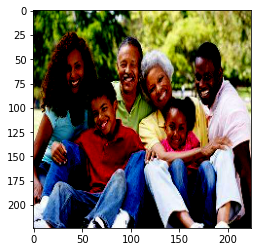

In [15]:
from matplotlib import pyplot as plt
n = 71
print(X_train[n])
plt.imshow(X_train[n])

(224, 224)

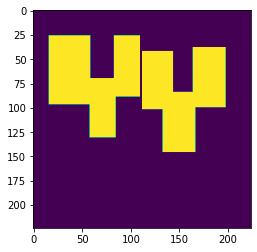

In [16]:
#Masking the faces in the previous image

plt.imshow(masks[n])
masks[n].shape

## Create the model (10 marks)
- Add MobileNet as model with below parameter values
  - input_shape: IMAGE_HEIGHT, IMAGE_WIDTH, 3
  - include_top: False
  - alpha: 1.0
  - weights: "imagenet"
- Add UNET architecture layers
  - This is the trickiest part of the project, you need to research and implement it correctly

In [0]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Concatenate, UpSampling2D, Conv2D, Reshape
from tensorflow.keras.models import Model

## Model Creation

In [0]:
def create_model(trainable=True):
    model =MobileNet(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3), include_top=False, alpha=1, weights="imagenet")
    for layer in model.layers:
        layer.trainable = trainable

    # Add all the UNET layers here
    
    #Upsampling part
    block1 = model.get_layer("conv_pw_1_relu").output
    block2 = model.get_layer("conv_pw_3_relu").output
    block3 = model.get_layer("conv_pw_5_relu").output
    block4 = model.get_layer("conv_pw_11_relu").output
    block5 = model.get_layer("conv_pw_13_relu").output

    x = Concatenate()([UpSampling2D()(block5), block4])
    x = Concatenate()([UpSampling2D()(x), block3])
    x = Concatenate()([UpSampling2D()(x), block2])
    x = Concatenate()([UpSampling2D()(x), block1])
    x = UpSampling2D()(x)
    x = Conv2D(1, kernel_size=1, activation="sigmoid")(x)
    x = Reshape((IMAGE_HEIGHT, IMAGE_WIDTH))(x)

    return Model(inputs=model.input, outputs=x)

### Call the create_model function

In [19]:
# Give trainable=False as argument, if you want to freeze lower layers for fast training (but low accuracy)
model = create_model()

# Print summary
model.summary()

17227776/17225924 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 32) 864         conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 32) 128         conv1[0][0]                      
_____________________________

### Define dice coefficient function (5 marks)
- Create a function to calculate dice coefficient


In [0]:
def dice_coefficient(y_true, y_pred):
    numerator = 2 * tf.reduce_sum(y_true * y_pred)
    denominator = tf.reduce_sum(y_true + y_pred)

    return numerator / (denominator + tf.keras.backend.epsilon())

### Define loss

In [0]:
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log, epsilon
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - log(dice_coefficient(y_true, y_pred) + epsilon())

### Compile the model (2 marks)
- Complie the model using below parameters
  - loss: use the loss function defined above
  - optimizers: use Adam optimizer
  - metrics: use dice_coefficient function defined above

In [0]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss=loss, optimizer=optimizer, metrics=[dice_coefficient])

### Define checkpoint and earlystopping

In [23]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint("model-{loss:.2f}.h5", monitor="loss", verbose=1, save_best_only=True,
                             save_weights_only=True, mode="min", period=1)
stop = EarlyStopping(monitor="loss", patience=5, mode="min")
reduce_lr = ReduceLROnPlateau(monitor="loss", factor=0.2, patience=5, min_lr=1e-6, verbose=1, mode="min")

### Fit the model (2 marks)
- Fit the model using below parameters
  - epochs: you can decide
  - batch_size: 1
  - callbacks: checkpoint, reduce_lr, stop

In [24]:
model.fit(X_train,masks,
                    epochs=120,
                    callbacks=[checkpoint, reduce_lr, stop],
                    workers=1,batch_size=1,
                    use_multiprocessing=False,
                    shuffle=True,
                    verbose=1)

Epoch 1/120
409/409 [==============================] - ETA: 0s - loss: 1.3369 - dice_coefficient: 0.4479
Epoch 00001: loss improved from inf to 1.33693, saving model to model-1.34.h5
409/409 [==============================] - 14s 35ms/step - loss: 1.3369 - dice_coefficient: 0.4479 - lr: 1.0000e-04
Epoch 2/120
409/409 [==============================] - ETA: 0s - loss: 0.7769 - dice_coefficient: 0.6153
Epoch 00002: loss improved from 1.33693 to 0.77685, saving model to model-0.78.h5
409/409 [==============================] - 14s 35ms/step - loss: 0.7769 - dice_coefficient: 0.6153 - lr: 1.0000e-04
Epoch 3/120
409/409 [==============================] - ETA: 0s - loss: 0.6190 - dice_coefficient: 0.6755
Epoch 00003: loss improved from 0.77685 to 0.61897, saving model to model-0.62.h5
409/409 [==============================] - 14s 35ms/step - loss: 0.6190 - dice_coefficient: 0.6755 - lr: 1.0000e-04
Epoch 4/120
409/409 [==============================] - ETA: 0s - loss: 0.5515 - dice_coefficien

### Note : The loss did not improve from 0.17501 and early spoting is achived at dice_coefficient 91.00%

dict_keys(['loss', 'dice_coefficient', 'lr'])


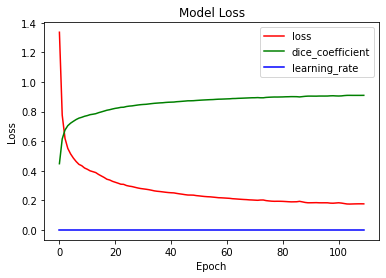

In [25]:
# list all data in history
print(model.history.history.keys())

# Summary - History for loss

plt.plot(model.history.history['loss'], color = 'red')
plt.plot(model.history.history['dice_coefficient'], color = 'green')
plt.plot(model.history.history['lr'], color = 'blue')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss', 'dice_coefficient', 'learning_rate'], loc='upper right')
plt.show();

### Get the predicted mask for a sample image   (3 marks)

In [0]:
n = 71
sample_image = X_train[n]
img = np.array([sample_image])
# Predicted Mask for a sample image
predicted_mask = model.predict(img)[0]

(224, 224)

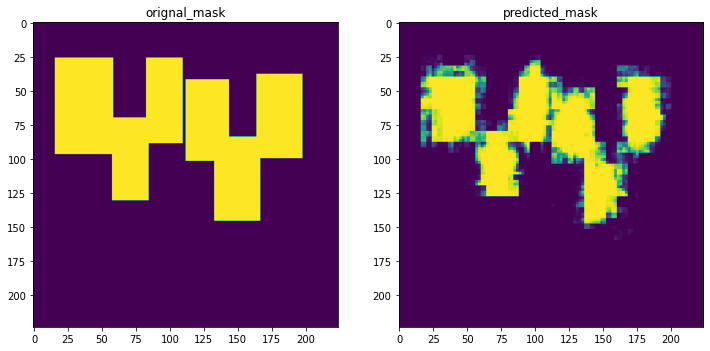

In [28]:
fig, (ax,ax1) = plt.subplots(1, 2, figsize = (12, 8))
ax.set_title('orignal_mask')
ax.imshow(masks[n])
ax1.set_title('predicted_mask')
ax1.imshow(predicted_mask)
predicted_mask.shape

### Impose the mask on the image (3 marks)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


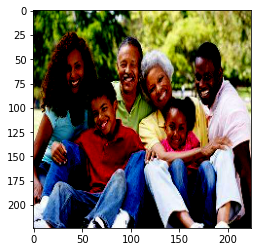

In [29]:
plt.imshow(X_train[n])

In [30]:
print(predicted_mask)

[[2.2481566e-14 2.2481566e-14 4.4251690e-15 ... 1.6991989e-19
  2.2457209e-19 2.2457209e-19]
 [2.2481566e-14 2.2481566e-14 4.4251690e-15 ... 1.6991989e-19
  2.2457209e-19 2.2457209e-19]
 [2.1003461e-14 2.1003461e-14 3.8782698e-14 ... 7.5152859e-19
  6.0510582e-20 6.0510582e-20]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.5541870e-22
  1.0900129e-22 1.0900129e-22]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.5565093e-23
  1.1244635e-22 1.1244635e-22]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.5565093e-23
  1.1244635e-22 1.1244635e-22]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


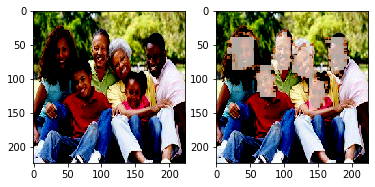

In [39]:
import numpy as np

masked = np.ma.masked_where(predicted_mask < 0.7, predicted_mask)

import matplotlib.pyplot as plt
plt.figure()
plt.subplot(1,2,1)
plt.imshow(X_train[n],'jet', interpolation='none')
plt.subplot(1,2,2)
plt.imshow(X_train[n], 'jet', interpolation='none')
plt.imshow(masked, 'Oranges_r', interpolation='none', alpha=0.7)
plt.show()